<a href="https://colab.research.google.com/github/ShubhamMistry/Predicting-Price-of-Airline-Tickets/blob/main/Predicting_Price_of_AirlineTicket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel(r'Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Problem Statements
Pre-processing and performing Featurization on "Date of Journey" Column

In [9]:
data=train_data.copy()

In [10]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
def change_into_datetime(col):
  data[col]=pd.to_datetime(data[col])

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
  change_into_datetime(feature)

In [15]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [17]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [18]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [19]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [20]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [21]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-21 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-21 05:50:00,2022-07-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [22]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [23]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-21 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-21 05:50:00,2022-07-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


Problem Statement
Cleaning departure and arrival time and featurizing it

In [24]:
def extract_hour_minute(df,col):
  df[col+'_hour']=df[col].dt.hour
  df[col+'_minute']=df[col].dt.minute
  df.drop(col,axis=1,inplace=True)
  return df.head(2)

In [25]:
extract_hour_minute(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [26]:
extract_hour_minute(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


Problem Statement
Analyzing when will most of the flights will take-off

In [27]:
def flight_dep_time(x):
  if (x>4) and (x<=8):
    return 'Early Morning'
  elif (x>4) and (x<=12):
    return 'Morning'
  elif (x>12) and (x<=14):
    return 'AfterNoon'
  elif (x>14) and (x<=20):
    return 'Evening'
  elif (x>20) and (x<=24):
    return 'Night'
  else:
    return 'Late Night'

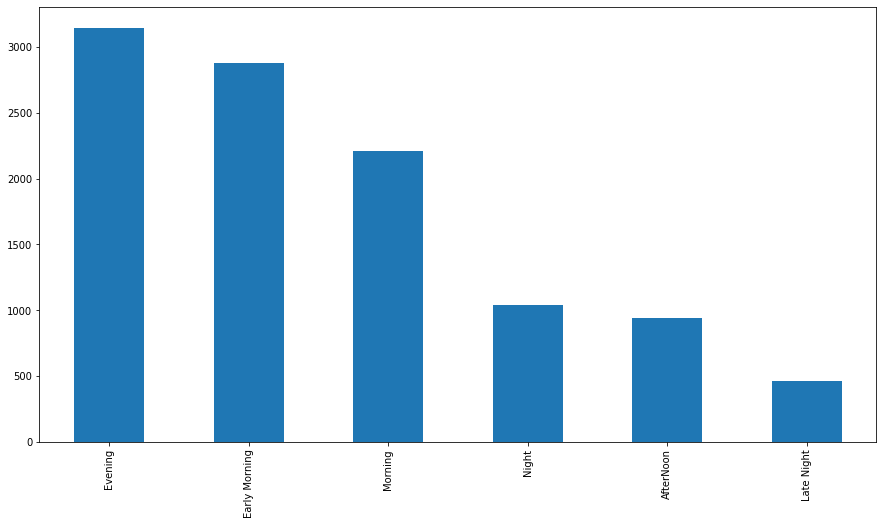

In [28]:
plt.figure(figsize=(15,8))
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

problem statement
pre processing Duration Feature and extracting meaningful features from it

In [29]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [30]:
def preprocess_duration(x):
  if 'h' not in x:
    "0h"+x
  elif 'm' not in x:
    x=x+'0m'
  return x

In [31]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [32]:
data['Duration']

0        2h 50m
1        7h 25m
2         19h0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680      3h0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [33]:
data['Duration'][0].split(' ')[0]

'2h'

In [34]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [35]:
data['Duration'][0].split(' ')[1]

'50m'

In [36]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [37]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(data['Duration'][0].split(' ')[0][0:-1]))

In [38]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(data['Duration'][1].split(' ')[0][0:-1]))

In [39]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,7
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,7


Analyse whether Duration impacts on price or not?
which city has maximum final destination of flights?

In [40]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','1').apply(eval)

In [41]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,7,621
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,7,671


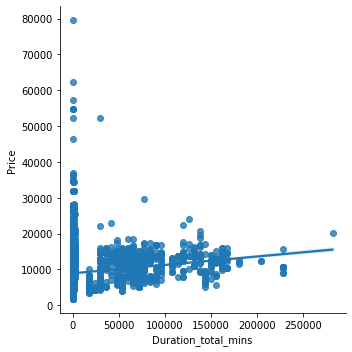

In [42]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

In [43]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [44]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

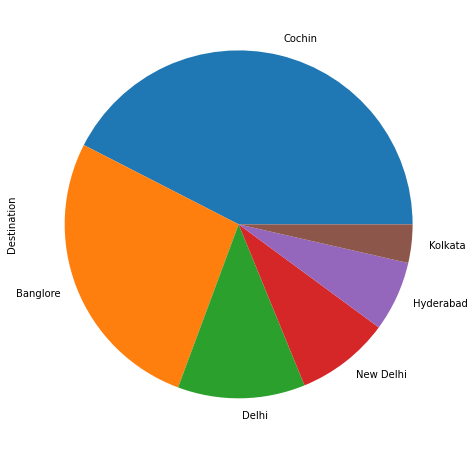

In [45]:
plt.figure(figsize=(15,8))
data['Destination'].value_counts().plot(kind='pie')

on which route Jet Airways is extremely used?

In [46]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [47]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Airline Vs Price Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

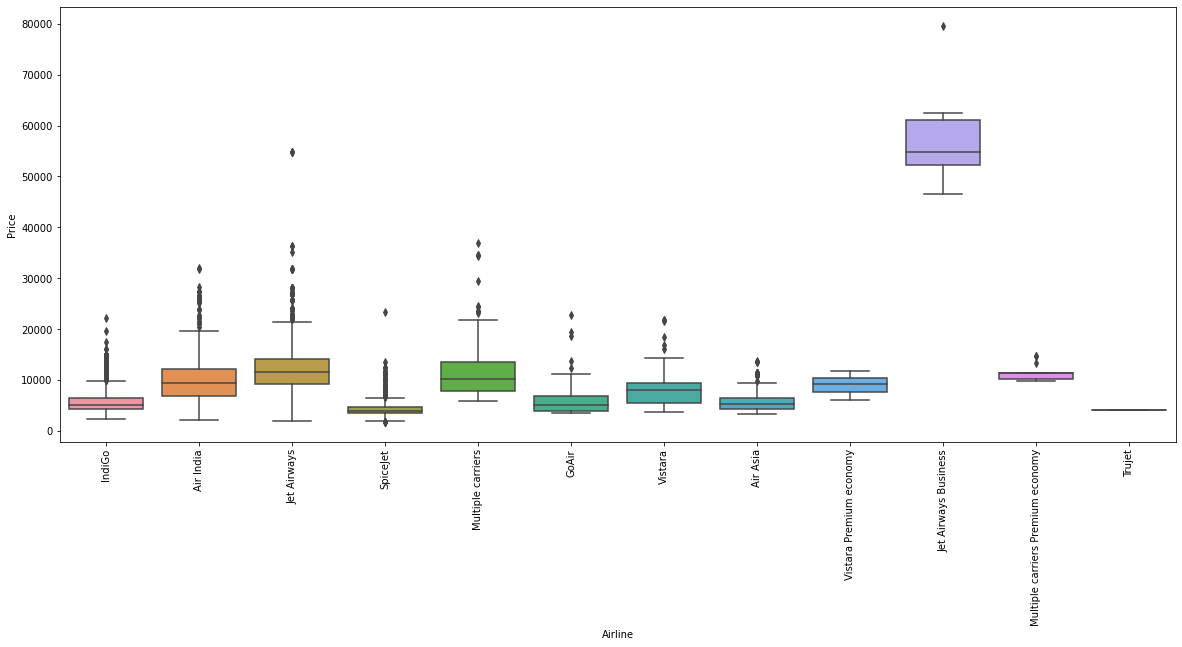

In [48]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Airline' ,y='Price',data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

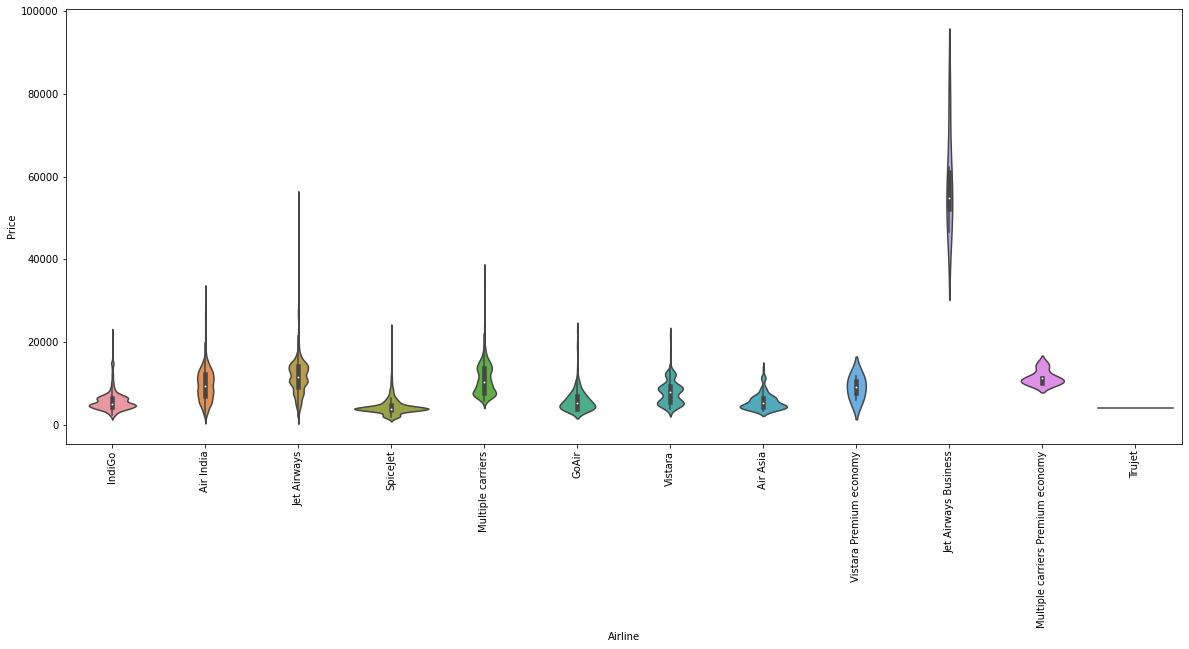

In [49]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Airline' ,y='Price',data=data)
plt.xticks(rotation='vertical')

 Applying One -hot on data

In [50]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,7,621
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,2,7,671
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h0m,2 stops,No info,13882,6,9,2019,9,25,4,25,2,7,114019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,2,7,551


In [51]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [52]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [53]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [54]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [55]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [56]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [57]:
data['Source'].apply(lambda x:1 if x== 'Banglore'else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [58]:
for category in data['Source'].unique():
  data['Source '+category]=data['Source'].apply(lambda x:1 if x== 'Banglore'else 0)

In [59]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,7,1,1,1,1,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,2,7,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h0m,2 stops,13882,6,9,9,25,4,25,2,7,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,2,7,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,2,7,1,1,1,1,1


Target Guided Encoding

In [60]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [61]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [62]:
dict1

{'Air Asia': 2,
 'Air India': 7,
 'GoAir': 4,
 'IndiGo': 3,
 'Jet Airways': 10,
 'Jet Airways Business': 11,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'SpiceJet': 1,
 'Trujet': 0,
 'Vistara': 5,
 'Vistara Premium economy': 6}

In [63]:
data['Airline']=data['Airline'].map(dict1)

In [64]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [65]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,7,1,1,1,1,1
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,2,7,0,0,0,0,0


In [66]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [67]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [68]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [69]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [70]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [71]:
dict2={key:index for index,key in enumerate(dest,0)}

In [72]:
dict2

{'Banglore': 3, 'Cochin': 4, 'Delhi': 2, 'Hyderabad': 1, 'Kolkata': 0}

In [73]:
data['Destination']=data['Destination'].map(dict2)

In [74]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [75]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,7,1,1,1,1,1
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,2,7,0,0,0,0,0


performing manual encoding on stops

In [76]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [77]:
stops={
    'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4
    }

In [78]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [79]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [80]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,7,1,1,1,1,1
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,2,7,0,0,0,0,0


performing outlier detection and dealing with Outlier

In [81]:
def plot(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)
  sns.distplot(df[col],ax=ax3,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

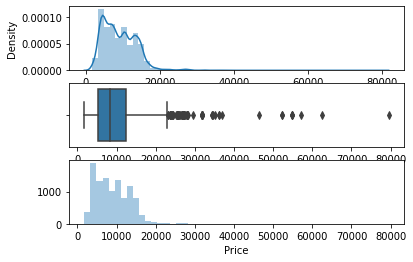

In [82]:
plot(data,'Price')

In [83]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

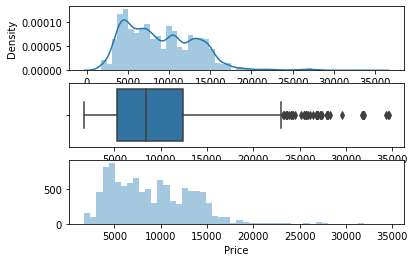

In [84]:
plot(data,'Price')

Selecting  best feature selection using Feature Selection Technique

In [85]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,7,1,1,1,1,1
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,2,7,0,0,0,0,0


In [86]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [87]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source Banglore,Source Kolkata,Source Delhi,Source Chennai,Source Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,7,1,1,1,1,1
1,7,3,2,7662.0,5,1,5,50,13,15,2,7,0,0,0,0,0


In [88]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source Banglore          int64
Source Kolkata           int64
Source Delhi             int64
Source Chennai           int64
Source Mumbai            int64
dtype: object

In [89]:
from sklearn.feature_selection import mutual_info_regression

In [90]:
#dependent and independent data
X=data.drop(['Price'],axis=1)

In [91]:
y=data['Price']

In [92]:
mutual_info_regression(X,y)

array([0.9680438 , 1.00114778, 0.78668867, 0.19281227, 0.23677531,
       0.34318035, 0.26149812, 0.4052559 , 0.35748938, 0.        ,
       0.        , 0.39508966, 0.38353391, 0.39367852, 0.38245752,
       0.38690074])

In [93]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)

In [94]:
imp.columns=['importance']

In [95]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,0.997082
Airline,0.973700
Total_Stops,0.785978
Arrival_Time_hour,0.401291
Source Chennai,0.392684
Source Mumbai,0.389156
Source Delhi,0.388466
Source Banglore,0.386082
Source Kolkata,0.385456
Arrival_Time_minute,0.352244


Building basic ml model &
save model


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
ml_model=RandomForestRegressor()

In [100]:
model=ml_model.fit(X_train,y_train)

In [101]:
y_pred=model.predict(X_test)

In [102]:
y_pred

array([16756.91,  6193.22,  8847.4 , ...,  3509.84,  6234.99,  6816.63])

In [103]:
y_pred.shape

(2671,)

In [104]:
len(X_test)

2671

Save Model

In [105]:
import pickle

In [106]:
file=open(r'rf_random.pkl','wb')

In [107]:
pickle.dump(model,file)

In [108]:
model=open(r'rf_random.pkl','rb')

In [109]:
forest=pickle.load(model)

In [110]:
forest.predict(X_test)

array([16756.91,  6193.22,  8847.4 , ...,  3509.84,  6234.99,  6816.63])

Defining Evaluation Metric
Automate ML Pipeline

In [111]:
#MAPE Mean Absolute Percentage and error
def mape(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [112]:
mape(y_test,forest.predict(X_test))

13.0764965233476

In [116]:
from sklearn import metrics

In [114]:
def predict(ml_model):
  model=ml_model.fit(X_train,y_train)
  print('Training_Score:{}'.format(model.score(X_train,y_train)))
  y_prediction=model.predict(X_test)
  print('Prediction are : {}'.format(y_prediction))
  print('\n')

  from sklearn import metrics
  r2_score=metrics.r2_score(y_test,y_prediction)
  print('r2_score: {}'.format(r2_score))
  print('MSE : ',metrics.mean_squared_error(y_test,y_prediction))
  print('MAE : ',metrics.mean_absolute_error(y_test,y_prediction))
  print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
  print('MAPE : ',mape(y_test,y_prediction))
  print('\n')
  sns.distplot(y_test-y_prediction)

Training_Score:0.9514769697687725
Prediction are : [16740.53  6367.11  9055.79 ...  3493.36  6355.29  6795.53]


r2_score: 0.8198185083815366
MSE :  3507701.145948303
MAE :  1154.6636969832032
RMSE :  1872.8857802728662
MAPE :  13.013055626613848




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


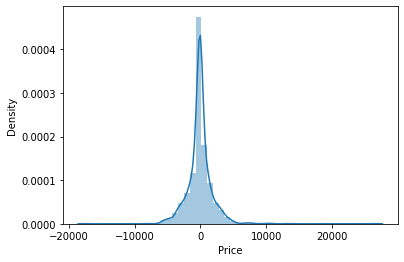

In [120]:
predict(RandomForestRegressor())

Training_Score:0.8867806765697166
Prediction are : [16840.  5752.  9187. ...  3419.  5797.  6818.]


r2_score: 0.6759974689556789
MSE :  6307551.564956945
MAE :  1384.0037439161363
RMSE :  2511.483936830364
MAPE :  15.059615281477045




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


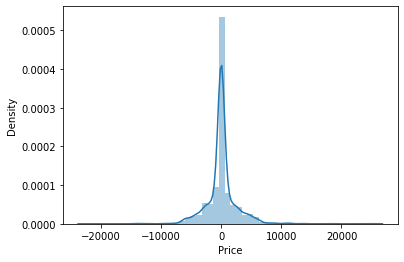

In [122]:
from sklearn.tree import DecisionTreeClassifier
predict(DecisionTreeClassifier())

Performing HyperTuning 

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
reg_rf=RandomForestRegressor()

In [128]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [158]:
n_estimators=[int(x)for x in np.linspace(start=1000,stop=1200,num=6) ]
max_features=['auto','sqrt']
max_depth=[int(x)for x in np.linspace(start=5,stop=20,num=4)]
min_samples_split=[5,10,15,100]

In [159]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [160]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2, n_jobs=-1)

In [161]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [162]:
rf_Random.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 1080}

In [164]:
pred2=rf_Random.predict(X_test)
pred2

array([16462.62448358,  6586.10287143,  8620.29652917, ...,
        4036.70998128,  7924.7103759 ,  6655.89525993])

In [167]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8230548700091815